# Web_Scraping_Assignment_3

In [326]:
#importing the required libraries
from selenium import webdriver
import warnings 
warnings.filterwarnings('ignore')
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.keys import Keys

**Q1. Write a python program which searches all the product under a particular product from www.amazon.in. 
The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search 
for guitars.**

In [333]:
#connecting to the web driver
driver=webdriver.Chrome('chromedriver.exe')

In [334]:
#passing the url and maximising the tab
url='https://www.amazon.in/'
driver.get(url)
driver.maximize_window()

In [335]:
#getting input from the user and passing the input to search bar by sending keys,then clicking the search button
input_=input('Enter the product you want to Search:\n')
Search_bar=driver.find_element_by_xpath('//input[@class="nav-input nav-progressive-attribute"]')
Search_bar.send_keys(input_)
Search_btn=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
Search_btn.click()
print(f'Your Product named {input_} has been searched.')

Enter the product you want to Search:
monitor
Your Product named monitor has been searched.


**Q2. In the above question, now scrape the following details of each product listed in first 3 pages of your 
search results and save it in a data frame and csv. In case if any product has less than 3 pages in search 
results then scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.**

In [336]:
#making empty lists to pass data
brand=[]
prod=[]
pric=[]
rtrn_ex=[]
p_url=[]
delivery=[]
Avail=[]

In [337]:
#getting the required fields then clicking next to scrape next page
k=0
for j in range(3):
    Next=driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    b_name=driver.find_elements_by_xpath('//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    price=driver.find_elements_by_xpath('//span[@class="a-price"]')    
    e_del=driver.find_elements_by_xpath('//div[@class="a-section a-spacing-none a-spacing-top-micro"]')
    for i in range(len(b_name)):
        brand.append(b_name[i].get_attribute('textContent').split()[0])
        prod.append(b_name[i].get_attribute('textContent'))
        pric.append(price[i].text)
        rtrn_ex.append('-')
        p_url.append(b_name[i].get_attribute('href'))
    for i in range(len(e_del)):
        if 'left in stock' in e_del[i].text:
            Avail.append(e_del[i].text.split('\n')[-1]+' at '+str(i))
        else:
            try:
                int(e_del[i].text.replace(',',''))
            except:
                if e_del[i].text.split('\n')[0]=="":
                    delivery.append('-')
                else:
                    delivery.append(e_del[i].text.split('\n')[0]) 
    Next.click()
    time.sleep(5)

In [338]:
#checking the length  of lists
len(delivery),len(brand),len(prod),len(pric),len(rtrn_ex),len(p_url),len(Avail)

(67, 70, 70, 70, 70, 70, 7)

In [339]:
Avail,len(prod)

(['Only 1 left in stock. at 29',
  'Only 1 left in stock. at 51',
  'Only 2 left in stock. at 25',
  'Only 1 left in stock. at 38',
  'Only 2 left in stock (more on the way). at 18',
  'Only 2 left in stock. at 34',
  'Only 1 left in stock. at 42'],
 70)

In [340]:
availability=[]
for i in range(62):
    availability.append('-')

In [341]:
df=pd.DataFrame()
df['Brand Name']=brand[:62]
df['Name of the Product']=prod[:62]
df["Price"]=pric[:62]
df["Return/Exchange"]=rtrn_ex[:62]
df["Expected Delivery"]=delivery[:62]
df["Availability"]=availability[:62]
df['Product URL']=p_url[:62]

In [342]:
df


,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,BenQ,"BenQ GW2780T 68.58 cm (27"") 1080p IPS Eye-Care...","₹18,990",-,"Get it by Tuesday, April 5",-,https://www.amazon.in/gp/slredirect/picassoRed...
1,BenQ,"BenQ EW2780 27""(68.58cm) Eye-Care, Entertainme...","₹17,490",-,"Get it by Tuesday, April 5",-,https://www.amazon.in/gp/slredirect/picassoRed...
2,Acer,Acer 21.5 Inch Full HD IPS Ultra Slim (6.6mm T...,"₹10,999",-,"Get it by Tuesday, April 5",-,https://www.amazon.in/Acer-HA220Q-21-5-inch-Ul...
3,Acer,Acer Aopen 21.5 inch Full HD 1920 X 1080 Resol...,"₹8,999",-,"Get it by Wednesday, April 6",-,https://www.amazon.in/Acer-Aopen-22CH1Q-21-5-i...
4,LG,"LG 22 inch (55 cm) IPS Monitor - Full HD, with...","₹10,999",-,"Get it by Tuesday, April 5",-,https://www.amazon.in/LG-22-inch-IPS-Monitor/d...
...,...,...,...,...,...,...,...
57,PHILIPS,PHILIPS 276E8VJSB 27 inches 3840 x 2160 Pixels...,"₹23,036",-,"Get it by Wednesday, April 6",-,https://www.amazon.in/PHILIPS-276E8VJSB-Ultran...
58,ViewSonic,ViewSonic VX2481-MH 24 inches FHD 1920 x 1080 ...,"₹16,669",-,"Get it by Wednesday, April 6",-,https://www.amazon.in/gp/slredirect/picassoRed...
59,AOC,"AOC 24B1XHS 23.8"" LCD Monitor withHDMI/VGA Por...","₹9,854",-,"Get it by Friday, April 8",-,https://www.amazon.in/gp/slredirect/picassoRed...
60,Lenovo,Lenovo ThinkVision S24e-20 23.8-inch FHD Monit...,"₹11,690",-,"Get it by Tuesday, April 5",-,https://www.amazon.in/Lenovo-ThinkVision-S24e-...


In [ ]:
df.to_csv('Monitor.csv')

**Q3.Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.**

In [343]:
driver=webdriver.Chrome('chromedriver.exe')

In [344]:
url='https://images.google.com/'
driver.get(url)

In [345]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
time.sleep(2)
search_btn=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')

In [346]:
lists=['cars','Machine Learning','Guitar','Cakes']
search_bar.send_keys('fruits')
search_btn.click()
time.sleep(2)
image_=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
fruit=[]
cars=[]
ML=[]
guitar=[]
cakes=[]
for i in range(10):
    fruit.append(image_[i].get_attribute('src'))    
for i in lists:
    search_btn2=driver.find_element_by_xpath('/html/body/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/button')
    search_bar2=driver.find_element_by_xpath('/html/body/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
    search_bar2.clear()
    search_bar2.send_keys(i)
    search_btn2.click()
    image_=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
    if i == 'cars':
        for i in range(10):
            cars.append(image_[i].get_attribute('src'))
    elif i == 'Machine Learning':
        for i in range(10):
            ML.append(image_[i].get_attribute('src'))
    elif i == 'Guitar':
        for i in range(10):
            guitar.append(image_[i].get_attribute('src'))
    elif i == 'Cakes':
        for i in range(10):
            cakes.append(image_[i].get_attribute('src'))
    search_bar2=driver.find_element_by_xpath('/html/body/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
    time.sleep(4)

 


  


  


  


 

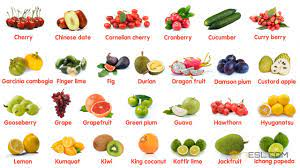
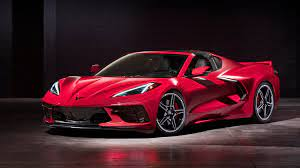
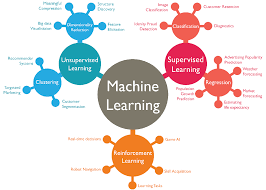
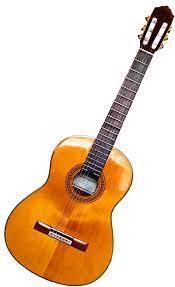
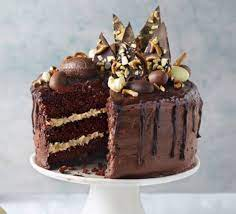

In [347]:
print(fruit[0],'\n\n\n',cars[0],'\n\n\n',ML[0],'\n\n\n',guitar[0],'\n\n\n',cakes[0])

**Q4.Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.**

In [348]:
driver=webdriver.Chrome('chromedriver.exe')

In [349]:
url='https://www.flipkart.com'
driver.get(url)

In [350]:
pop_up=driver.find_element_by_xpath('/html/body/div[2]/div/div/button')
pop_up.click()

In [351]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_bar.send_keys('iphone')
search_btn=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search_btn.click()

In [352]:
brand=[]#
pro=[]#
col=[]#
ram=[]#
storage=[]#
r_cam=[]#
f_cam=[]#
d_size=[]#
bat=[]
price=[]#
p_url=[]#

In [353]:
product=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
for i in product:
    if i.text.split('(')[1].split(',')[0]=='':
        col.append(i.text.split(')')[1].split(',')[0].replace('(',""))
    else:
        col.append(i.text.split('(')[1].split(',')[0])
    brand.append(i.text.split()[0])
    pro.append(i.text.split()[1]+str(' ')+i.text.split()[2])
    try:
        storage.append(i.text.split('(')[1].split(',')[1].replace(')',''))
    except:
        storage.append(i.text.split(')')[1].split(',')[1])

In [354]:
for i in range(len(product)):
    ram.append('-')

In [355]:
pric=driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')
for i in pric:
    price.append(i.text)

In [356]:
Url=driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for i in Url:
    p_url.append(i.get_attribute('href'))

In [357]:
desc=driver.find_elements_by_xpath('//li[@class="rgWa7D"]')
for i in desc:
    if 'Display' and 'inch' in i.text:
        d_size.append(i.text.split()[2].replace('(','')+str(' ')+i.text.split()[3].replace(')','').replace(')',''))
    elif 'Camera' and 'MP' in i.text and 'TrueDepth' not in i.text:
        r_cam.append(i.text.split('|')[0].split()[0])
        f_cam.append(i.text.split('|')[1].split()[0])

In [358]:
for i in range(len(product)):
    bat.append('-')

In [359]:
df=pd.DataFrame()
df['Brand']=brand
df['Product']=pro
df['Color']=col
df['RAM']=ram
df['Storage']=storage
df['Display Size']=d_size
df['Front camera']=f_cam
df['Rear camera']=r_cam
df['Battery Capacity']=bat
df['Price']=price
df['Product Url']=p_url

In [360]:
df

,Brand,Product,Color,RAM,Storage,Display Size,Front camera,Rear camera,Battery Capacity,Price,Product Url
0,APPLE,iPhone SE,Red,-,128 GB,4.7 inch,7MP,12MP,-,"₹34,999",https://www.flipkart.com/apple-iphone-se-red-1...
1,APPLE,iPhone SE,Red,-,64 GB,4.7 inch,7MP,12MP,-,"₹30,199",https://www.flipkart.com/apple-iphone-se-red-6...
2,APPLE,iPhone SE,Black,-,64 GB,4.7 inch,7MP,12MP,-,"₹30,199",https://www.flipkart.com/apple-iphone-se-black...
3,APPLE,iPhone SE,White,-,64 GB,4.7 inch,7MP,12MP,-,"₹30,199",https://www.flipkart.com/apple-iphone-se-white...
4,APPLE,iPhone 12,Blue,-,64 GB,5.4 inch,12MP,12MP,-,"₹49,999",https://www.flipkart.com/apple-iphone-12-mini-...
5,APPLE,iPhone 13,Blue,-,128 GB,5.4 inch,12MP,12MP,-,"₹64,900",https://www.flipkart.com/apple-iphone-13-mini-...
6,APPLE,iPhone 13,Blue,-,128 GB,6.1 inch,12MP,12MP,-,"₹74,900",https://www.flipkart.com/apple-iphone-13-blue-...
7,APPLE,iPhone 13,Pink,-,128 GB,5.4 inch,12MP,12MP,-,"₹64,900",https://www.flipkart.com/apple-iphone-13-mini-...
8,APPLE,iPhone 13,Midnight,-,128 GB,6.1 inch,12MP,12MP,-,"₹74,890",https://www.flipkart.com/apple-iphone-13-midni...
9,APPLE,iPhone 13,Midnight,-,128 GB,5.4 inch,12MP,12MP,-,"₹64,900",https://www.flipkart.com/apple-iphone-13-mini-...


**Q5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.**

In [361]:
url='https://www.google.com/maps/'
driver=webdriver.Chrome('chromedriver.exe')

In [362]:
driver.get(url)

In [363]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options

In [365]:
wait = WebDriverWait(driver, 10)
wait.until(EC.element_to_be_clickable((By.ID, "searchboxinput"))).send_keys('Delhi')
wait.until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton"))).click()
time.sleep(7)
ActionChains(driver).move_to_element(driver.find_element_by_xpath("//html/body")).context_click().perform()
Loc=wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "ul[role='menu']>li div div[class*='text']:nth-of-type(1)"))).text
print(Loc.split(',')[0]+' North '+Loc.split(',')[1]+' East')

28.64730 North  76.81029 East


**Q6.Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.**

In [317]:
url='https://www.trak.in'

In [318]:
driver=webdriver.Chrome('chromedriver.exe')

In [319]:
driver.get(url)

In [325]:
fund=driver.find_element_by_xpath('//a[@title="http://trak.in/india-startup-funding-investment-2015/"]')
fund.click()

**Q7. Write a program to scrap all the available details of best gaming laptops from digit.in.**

In [21]:
url='https://www.digit.in'

In [22]:
driver=webdriver.Chrome('chromedriver.exe')

In [23]:
driver.get(url)

In [24]:
search_bar=driver.find_element_by_class_name("search")
search_bar.click()

In [30]:
search_bar_type=driver.find_element_by_xpath('//input[@id="globalPageSearchText"]')
search_bar_type.send_keys('Gaming Laptop')   
search_bar_type.send_keys(Keys.RETURN)

In [31]:
LAPTOP=driver.find_elements_by_xpath('//div[@class="searchProduct-desc"]')
lap=[]
for i in LAPTOP:
    lap.append(i.text)

In [38]:
pd.DataFrame(lap,columns=['Gaming Laptops']).set_index('Gaming Laptops')

""
Gaming Laptops
ASUS GX501 Zephyrus Gaming Laptop
ASUS TUF Gaming Laptop FX506LI-HN270T
HP Pavilion Gaming Ryzen 5 Hexa Core-5600H (2021)
MSI Gaming GL63 9RDS-853IN
ASUS ROG Zephyrus G14 (2021)
HP Omen Ryzen 5 4600H
Acer Predator Triton 700
HP Pavilion G6-1202TX
Asus G750JX-CV069P


 **Q8.Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.**


In [78]:
url='https://www.forbes.com/real-time-billionaires/#17bf7e9b3d78'

In [79]:
driver=webdriver.Chrome('chromedriver.exe')

In [80]:
driver.get(url)

In [82]:
name_=driver.find_elements_by_xpath('//td[@class="name"]')
name=[]
rank=[]
k=1
industry=[]
for i in name_:
    name.append(i.text)
    rank.append(k)
    industry.append('-')
    k+=1

In [83]:
worth=[]
worth_=driver.find_elements_by_xpath('//td[@class="Net Worth"]')
for i in worth_:
    worth.append(i.text)

In [84]:
age=[]
age_=driver.find_elements_by_xpath('//td[@class="age"]')
for i in age_:
    age.append(i.text+' yrs')

In [85]:
source=[]
source_=driver.find_elements_by_xpath('//td[@class="source"]')
for i in source_:
    if i.text=="":
        source.append(i.get_attribute('textContent'))
    else:
        source.append(i.text)

In [86]:
origin=[]
citzen=driver.find_elements_by_xpath('//td[@class="Country/Territory"]')
for i in citzen:
    if i.text=="":
        origin.append(i.get_attribute('textContent'))
    else:
        origin.append(i.text)

In [90]:
df=pd.DataFrame()
df['Rank']=rank
df['Name']=name
df['Net Worth']=worth
df['Age']=age
df['Origin']=origin
df['Source']=source
df['Industry']=industry
df.set_index('Rank')

,Name,Net Worth,Age,Origin,Source,Industry
Rank,,,,,,
1,Elon Musk,$287.6 B,50 yrs,United States,"Tesla, SpaceX",-
2,Jeff Bezos,$189.3 B,58 yrs,United States,Amazon,-
3,Bernard Arnault & family,$173.5 B,73 yrs,France,LVMH,-
4,Bill Gates,$135.0 B,66 yrs,United States,Microsoft,-
5,Warren Buffett,$127.0 B,91 yrs,United States,Berkshire Hathaway,-
6,Larry Page,$118.7 B,49 yrs,United States,Google,-
7,Larry Ellison,$115.1 B,77 yrs,United States,software,-
8,Sergey Brin,$114.0 B,48 yrs,United States,Google,-
9,Gautam Adani & family,$103.4 B,59 yrs,India,"infrastructure, commodities",-


**Q9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video.**

In [186]:
url='https://www.youtube.com/watch?v=JKa05nyUmuQ'

In [187]:
driver=webdriver.Chrome('chromedriver.exe')
time.sleep(2)
driver.get(url)

In [195]:
pause=driver.find_element_by_xpath('//button[@class="ytp-play-button ytp-button"]')
pause.click()
for i in range(25):
    time.sleep(5)
    driver.find_element_by_tag_name('body').send_keys(Keys.END)
time.sleep(4)
days=driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]')
day=[]
for i in range(500):
        day.append(days[i].text)

In [197]:
comment=driver.find_elements_by_xpath('//yt-formatted-string[@id="content-text"]')
com=[]
for i in comment:
    com.append(i.text)

In [200]:
Comments=pd.DataFrame()
Comments['Posted']=day
Comments['Comment']=com[:500]

In [201]:
Comments

,Posted,Comment
0,2 days ago,No words for trailer . we youtubers will promo...
1,1 day ago,Money is like a Dettol\nIt kills 99.99% of pro...
2,9 hours ago,Goosebumps KGF 2 is going to break all records
3,11 hours ago,"KGF = Not just movie, not just emotions, even ..."
4,1 day ago,"The hype ,the energy ,the craze this movie has..."
...,...,...
495,11 hours ago,2:33
496,7 days ago,"After hearing RRR’s bgm in theatres, we can on..."
497,6 hours ago,Finally 75 million views complete
498,5 hours ago,"Bollywood is like the villain, who think they ..."


**Q10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description**

In [277]:
hostel_name=[]
distance=[]
ratings=[] 
total_reviews=[]
overall_reviews=[] 
privates_price=[]
dorms_price=[]
facilities=[] 
property_desc=[]

In [283]:
url='https://www.hostelworld.com/'
driver=webdriver.Chrome('chromedriver.exe')

In [284]:
driver.get(url)

In [286]:
search_bar=driver.find_element_by_class_name('search-input')
search_bar.send_keys('London')

In [287]:
search_btn=driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[2]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]')
search_btn.click()

In [289]:
search_btn2=driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[2]/div/div[2]/div[4]/div/div[2]/div/div[5]')
search_btn2.click()

In [290]:
dis=driver.find_elements_by_xpath('//span[@class="description"]')
for i in dis:
    distance.append(i.text)

In [291]:
name=driver.find_elements_by_xpath('//h2[@data-v-2f0a89ac]')
for i in range(len(name)):
    if i%6==1:
        hostel_name.append(name[i].text)

In [292]:
rat=driver.find_elements_by_xpath('//div[@data-v-8f08c426]')
for i in rat:
    ratings.append(i.text)

In [293]:
all_rat=driver.find_elements_by_xpath('//div[@class="reviews"]')
for i in all_rat:
    total_reviews.append(i.text)

In [294]:
ov_review=driver.find_elements_by_xpath('//div[@class="keyword"]')
for i in ov_review:
    overall_reviews.append(i.text)

In [295]:
p_price=driver.find_elements_by_xpath('//div[@class="price title-5"]')
for i in range(len(p_price)):
    if i%2==1:
       privates_price.append(p_price[i].text)
    else:
        dorms_price.append(p_price[i].text)

In [296]:
fal=driver.find_elements_by_xpath('//span[@class="label"]')
for i in fal:
    facilities.append(i.text)

In [297]:
df=pd.DataFrame()

In [304]:
df["Name"]=hostel_name[:5]
df["Distance"]=distance[:5]
df["Ratings"]=ratings[:5]
df["Total Revies"]=total_reviews[:5]
df["Overall Reviews"]=overall_reviews[:5]
df["Private Price"]=privates_price[:5]
df["Dorms Price"]=dorms_price[:5]
df["facilities"]=facilities[:5]

In [305]:
df

,Name,Distance,Ratings,Total Revies,Overall Reviews,Private Price,Dorms Price,facilities
0,Generator London,Hostel - 1.7km from city centre,7.7,4129 Total Reviews,Very Good,NPR2908,NPR14540,Free WiFi
1,No.8 Seven Sisters,Hostel - 3km from city centre,7.8,6849 Total Reviews,Very Good,NPR3604,NPR9952,Follows Covid-19 sanitation guidance
2,Prime Backpackers Angel,Hostel - 5.4km from city centre,9.6,229 Total Reviews,Superb,NPR3199,NPR14393,Free WiFi
3,Smart Hyde Park Inn Hostel,Hostel - 4.3km from city centre,8.5,11420 Total Reviews,Fabulous,NPR14540,NPR2639,Follows Covid-19 sanitation guidance
4,St Christopher's Camden,Hostel - 2.3km from city centre,9.0,2302 Total Reviews,Superb,NPR4192,NPR2486,Free WiFi
